In [137]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb


Set a seed if we want to always generate the same sequence of random numbers. This gives us reproducible inputs for debugging. Comment it out if reproduciblility is not required.

In [138]:
np.random.seed(123)

Generate 300 rows, each row is an array of 3 random numbers in the range of -100 and 100.

In [139]:
x_train = np.random.randint(-100, 100, size=(300, 3))

print(x_train.shape)
print(x_train)

(300, 3)
[[   9   26  -34]
 [  -2  -83  -17]
 [   6   23  -43]
 [  -4   13   26]
 [ -53  -27  -68]
 [  74   11   53]
 [ -17  -22   64]
 [  -4  -32  -51]
 [ -45   95  -98]
 [ -16  -61  -34]
 [ -16  -53   89]
 [  76   35    5]
 [  -1   24   -8]
 [  80    2   -3]
 [  18   -6   55]
 [ -66  -24   68]
 [  31    6  -31]
 [ -36  -25   62]
 [ -42   38  -78]
 [  46  -85   55]
 [  58   80  -30]
 [   9   15   54]
 [  34  -86    3]
 [  82   99   29]
 [ -57   86    1]
 [  83  -75   78]
 [ -44  -51  -88]
 [ -82  -99  -49]
 [  72   17  -52]
 [ -44   77  -14]
 [ -97  -33   39]
 [  49    3   -2]
 [ -97   39  -97]
 [ -94  -91  -13]
 [ -86   21   98]
 [  40   82  -73]
 [ -62   45   89]
 [  10  -26   -1]
 [  16   -1   93]
 [ -53  -84   33]
 [   4    9  -14]
 [ -54  -85  -41]
 [ -60   53  -55]
 [  77 -100   63]
 [  57   29  -32]
 [  58   35   -7]
 [ -40  -35   16]
 [ -33  -56  -49]
 [  35  -12   98]
 [  41   56    8]
 [ -37  -16   64]
 [  19   21   68]
 [  16   91  -42]
 [ -23  -92   34]
 [ -35   98  -60]
 

Generate the sum for each row in x_train.

In [140]:
y_train = np.array([[sum(x)] for x in x_train])

print(y_train.shape)
print(y_train)

(300, 1)
[[   1]
 [-102]
 [ -14]
 [  35]
 [-148]
 [ 138]
 [  25]
 [ -87]
 [ -48]
 [-111]
 [  20]
 [ 116]
 [  15]
 [  79]
 [  67]
 [ -22]
 [   6]
 [   1]
 [ -82]
 [  16]
 [ 108]
 [  78]
 [ -49]
 [ 210]
 [  30]
 [  86]
 [-183]
 [-230]
 [  37]
 [  19]
 [ -91]
 [  50]
 [-155]
 [-198]
 [  33]
 [  49]
 [  72]
 [ -17]
 [ 108]
 [-104]
 [  -1]
 [-180]
 [ -62]
 [  40]
 [  54]
 [  86]
 [ -59]
 [-138]
 [ 121]
 [ 105]
 [  11]
 [ 108]
 [  65]
 [ -81]
 [   3]
 [  48]
 [ -29]
 [  42]
 [ -50]
 [   2]
 [ -52]
 [  22]
 [  93]
 [  74]
 [  30]
 [  85]
 [  14]
 [ 195]
 [ -97]
 [  -2]
 [  71]
 [  19]
 [   1]
 [ -72]
 [ 192]
 [  30]
 [-196]
 [-118]
 [ -60]
 [-127]
 [  83]
 [ 125]
 [-129]
 [ -19]
 [ -30]
 [ 132]
 [ 138]
 [   6]
 [ -42]
 [ -44]
 [  -4]
 [-159]
 [  35]
 [  58]
 [ 147]
 [ -95]
 [  48]
 [  33]
 [  -4]
 [  87]
 [  26]
 [ -52]
 [ -63]
 [ -10]
 [-103]
 [ -21]
 [-215]
 [ -61]
 [  21]
 [ -61]
 [ 241]
 [  74]
 [  71]
 [ -54]
 [ -72]
 [ -22]
 [ -45]
 [  42]
 [ -35]
 [ -10]
 [ -35]
 [  -8]
 [ -74]
 [  46]

Generate test data where each row has 3 inputs (same as how we have trained our neural network).

In [141]:
x_test = np.random.randint(-100, 100, size=(20, 3))

print(x_test.shape)
print(x_test)

(20, 3)
[[ 80  75 -34]
 [ 82 -69 -43]
 [-23 -32 -73]
 [-29   8 -41]
 [-88 -83  78]
 [-51 -58 -16]
 [-55 -77 -96]
 [ 57 -58 -48]
 [ 51   2  41]
 [ 63  53 -88]
 [-80 -11  -3]
 [-61 -58 -42]
 [-52  74  46]
 [ 39 -65  21]
 [ -7   7 -68]
 [  7  26 -14]
 [-39  68 -82]
 [  0 -70 -51]
 [ 69   2 -84]
 [ 95 -95 -41]]


Generate the sum for each row of test data.

In [142]:
y_test = np.array([[sum(x)] for x in x_test])

print(y_test.shape)
print(y_test)

(20, 1)
[[ 121]
 [ -30]
 [-128]
 [ -62]
 [ -93]
 [-125]
 [-228]
 [ -49]
 [  94]
 [  28]
 [ -94]
 [-161]
 [  68]
 [  -5]
 [ -68]
 [  19]
 [ -53]
 [-121]
 [ -13]
 [ -41]]


Construct our model with a hidden layer.

In [184]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_shape=(x_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=None)

Train our model.

In [185]:
history = model.fit(x_train, y_train, epochs=100)

Train on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 481us/sample - loss: 11315.2315
Epoch 2/100
300/300 [==============================] - 0s 24us/sample - loss: 10080.0050
Epoch 3/100
300/300 [==============================] - 0s 19us/sample - loss: 8863.3434
Epoch 4/100
300/300 [==============================] - 0s 26us/sample - loss: 7778.7750
Epoch 5/100
300/300 [==============================] - 0s 19us/sample - loss: 6730.4898
Epoch 6/100
300/300 [==============================] - 0s 27us/sample - loss: 5764.7599
Epoch 7/100
300/300 [==============================] - 0s 19us/sample - loss: 4827.0777
Epoch 8/100
300/300 [==============================] - 0s 27us/sample - loss: 3991.0727
Epoch 9/100
300/300 [==============================] - 0s 20us/sample - loss: 3239.1340
Epoch 10/100
300/300 [==============================] - 0s 19us/sample - loss: 2566.2040
Epoch 11/100
300/300 [==============================] - 0s 19us/sample - loss: 1971.4524
Epoch 

Perform auto-evaluation with test data.

In [186]:
loss = model.evaluate(x=x_test, y=y_test)
print('Loss = ', loss, '\n')


Loss =  1.221653699874878 



/Users/cherwah/python37_venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2366: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Plot the "loss" during our training. Notice that the model learns very quickly as the loss drops very sharply.

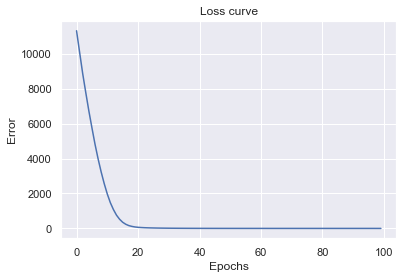

In [187]:
fig, ax = plt.subplots()

plt.plot(history.history['loss'])
ax.set_xlabel('Epochs')
ax.set_ylabel('Error')
ax.set_title('Loss curve')

plt.show()

Manually feed in each row of test data and get the predicted result from our model.

In [188]:
predictions = model.predict(x=x_test)
for i in np.arange(len(predictions)):
    print('Data: ', x_test[i], ', Actual: ', y_test[i], ', Predicted: ', predictions[i])


Data:  [ 80  75 -34] , Actual:  [121] , Predicted:  [121.1813]
Data:  [ 82 -69 -43] , Actual:  [-30] , Predicted:  [-28.607418]
Data:  [-23 -32 -73] , Actual:  [-128] , Predicted:  [-128.77644]
Data:  [-29   8 -41] , Actual:  [-62] , Predicted:  [-62.769978]
Data:  [-88 -83  78] , Actual:  [-93] , Predicted:  [-94.80344]
Data:  [-51 -58 -16] , Actual:  [-125] , Predicted:  [-125.493324]
Data:  [-55 -77 -96] , Actual:  [-228] , Predicted:  [-227.2955]
Data:  [ 57 -58 -48] , Actual:  [-49] , Predicted:  [-48.284424]
Data:  [51  2 41] , Actual:  [94] , Predicted:  [93.726616]
Data:  [ 63  53 -88] , Actual:  [28] , Predicted:  [28.506958]
Data:  [-80 -11  -3] , Actual:  [-94] , Predicted:  [-93.8404]
Data:  [-61 -58 -42] , Actual:  [-161] , Predicted:  [-161.39159]
Data:  [-52  74  46] , Actual:  [68] , Predicted:  [67.00126]
Data:  [ 39 -65  21] , Actual:  [-5] , Predicted:  [-6.820639]
Data:  [ -7   7 -68] , Actual:  [-68] , Predicted:  [-67.29175]
Data:  [  7  26 -14] , Actual:  [19] , 

In [189]:
predictions

array([[ 121.1813  ],
       [ -28.607418],
       [-128.77644 ],
       [ -62.769978],
       [ -94.80344 ],
       [-125.493324],
       [-227.2955  ],
       [ -48.284424],
       [  93.726616],
       [  28.506958],
       [ -93.8404  ],
       [-161.39159 ],
       [  67.00126 ],
       [  -6.820639],
       [ -67.29175 ],
       [  19.120312],
       [ -51.43824 ],
       [-120.10448 ],
       [ -15.411834],
       [ -39.4624  ]], dtype=float32)

Sum up each row in x_test. 

In [190]:
x_test_sum = np.sum(x_test, axis=1)

x_test_sum

array([ 121,  -30, -128,  -62,  -93, -125, -228,  -49,   94,   28,  -94,
       -161,   68,   -5,  -68,   19,  -53, -121,  -13,  -41])

In [191]:
preds_1D = predictions.reshape((20,))

preds_1D

array([ 121.1813  ,  -28.607418, -128.77644 ,  -62.769978,  -94.80344 ,
       -125.493324, -227.2955  ,  -48.284424,   93.726616,   28.506958,
        -93.8404  , -161.39159 ,   67.00126 ,   -6.820639,  -67.29175 ,
         19.120312,  -51.43824 , -120.10448 ,  -15.411834,  -39.4624  ],
      dtype=float32)

In [192]:
actuals_1D = np.sum(x_test, axis=1)

actuals_1D

array([ 121,  -30, -128,  -62,  -93, -125, -228,  -49,   94,   28,  -94,
       -161,   68,   -5,  -68,   19,  -53, -121,  -13,  -41])

Plotting both the Actual Sums and Predicted Sums on the same figure. Notice how close the predicted values are to the actual ones.

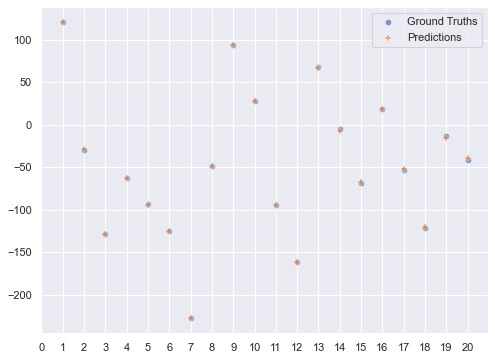

In [210]:
sb.set(style='darkgrid')

fig, ax = plt.subplots(figsize=(8, 6))

sb.scatterplot(x=range(1,21), y=actuals_1D, label="Ground Truths", alpha=0.7)
sb.scatterplot(x=range(1,21), y=preds_1D, label="Predictions", marker='P', alpha=0.7)

ax.set_xticks(range(21))

plt.show()